FULL_NAME:  ADEGUNLE AHMED BABATUNDE

LEADERBOARD_NAME: 神之子

KAGGLE_ID: Adegunle.A Babatunde

STUDENT STATUS: GRADUATE STUDENT

GENDER: MALE

SPECIAL_SERVICES: AI+ CLUB MEMEBER

NAME_OF_SCHOOL:  EKITI STATE UNIVERSITY, ADO-EKITI

PLACE_OF_WORK: LAGOS

ORGANIZATION: FREELANCER.

# HYPOTHESIS GENERATION

The ML problem framing! to  predict who is likely to be promoted or not 'a discrete problem'... 
Lets make a brief hypothesis. i.e the possible / expected explanation of the past(data) about the future.
before exploring the data, some certain questions need to arise towards this task/

what could be a distinctive feature for predicting this task?, e.g years of service.
Thinking ahead before exploring the data would bring a cause for argumenatitive, judgemental, curiosity and scalability.

# SETTINGS AND IMPORTING DEPENDENCIES NEEDED FOR THIS TASK

In [2]:
#Linear Algebra
import numpy as np
#Data preprocessing
import pandas as pd
#setting display options
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)
pd.set_option('max_colwidth', 300)
np.set_printoptions(linewidth =400)
#Catboost Classifier Algorithm
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import classification_report
#Matlab-style plotting
from matplotlib import pyplot as plt
%matplotlib inline
#Advance-style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')
#Ignore annoying warning from sklearn and seaborn
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# DATA PREPARATION

In [3]:
#Read csv file from the computer both train and test data
train = pd.read_csv(r'C:\Users\ABOFFICIAL\Desktop\kaggle\intercampusai2019\train.csv', encoding = 'utf-8')
test = pd.read_csv(r'C:\Users\ABOFFICIAL\Desktop\kaggle\intercampusai2019\test.csv', encoding ='utf-8')

In [4]:
#preview any three samples from the train data to see what the dataset looks like
train.sample(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
31381,YAK/S/44795,Sourcing and Purchasing,"MSc, MBA and PhD",Male,Direct Internal process,2,1968,12.5,1997,1,0,59,EDO,Yes,Married,No,No,0,0
587,YAK/S/00831,Sourcing and Purchasing,First Degree or HND,Male,Direct Internal process,2,1971,7.5,2011,0,0,63,LAGOS,Yes,Married,No,No,1,0
9709,YAK/S/13770,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,3,1968,2.5,2001,0,0,38,BAUCHI,Yes,Single,No,No,5,0


In [5]:
#Lets change the upper case of 'state of origin' data for moderacy of our data; Though not necessarry
train['State_Of_Origin'] = train.State_Of_Origin.str.title()
test['State_Of_Origin'] = test.State_Of_Origin.str.title()

In [7]:
#lets preview the shape of the data(both train and test)
print('Train - The dataset oberservations and columns are {}'. format(train.shape))
print('Test - The dataset oberservations and columns are {}'. format(test.shape))

Train - The dataset oberservations and columns are (38312, 19)
Test - The dataset oberservations and columns are (16496, 18)


In [36]:
#Lets check for all uniqueness in features by defining a fxn to iterate through the dataframe
import time
def unique(data, cols):
    for iterating_col in cols:
        val = data[iterating_col].value_counts().count()
        print('Iterating...')
        time.sleep(2)
        print('\n' + iterating_col+ ' ' + ' Column')
        print(val)
#lets create an array for features to count for       
columns = ['Division', 'Qualification', 'Gender', 'Channel_of_Recruitment',
       'Trainings_Attended', 'Year_of_birth', 'Last_performance_score', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'State_Of_Origin', 'Foreign_schooled',
       'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers']


unique(train, columns)

Iterating...

Division  Column
9
Iterating...

Qualification  Column
3
Iterating...

Gender  Column
2
Iterating...

Channel_of_Recruitment  Column
3
Iterating...

Trainings_Attended  Column
10
Iterating...

Year_of_birth  Column
49
Iterating...

Last_performance_score  Column
6
Iterating...

Targets_met  Column
2
Iterating...

Previous_Award  Column
2
Iterating...

Training_score_average  Column
61
Iterating...

State_Of_Origin  Column
37
Iterating...

Foreign_schooled  Column
2
Iterating...

Marital_Status  Column
3
Iterating...

Past_Disciplinary_Action  Column
2
Iterating...

Previous_IntraDepartmental_Movement  Column
2
Iterating...

No_of_previous_employers  Column
7


In [17]:
#Lets checking for missing values
train_missing =train.apply(lambda x: sum(x.isnull()), axis =0)
test_missing =test.apply(lambda x: sum(x.isnull()), axis =0)
print('[Train-m_values] ' , train_missing)
print('[Test-m_values] ' , test_missing)

[Train-m_values]  EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64
[Test-m_values]  EmployeeNo                               0
Division                                 0
Qualification                 

In [18]:
#Lets preview these so that we can make a collective and meaniful insight with the data
#likwise model performance in mapping for prediction
print('Train_set'+ '\n'+ '',train['Training_score_average'].describe().round(1),'\n','Test_set'+ '\n'+ '',
test['Training_score_average'].describe().round(1))

Train_set
 count    38312.0
mean        55.4
std         13.4
min         31.0
25%         43.0
50%         52.0
75%         68.0
max         91.0
Name: Training_score_average, dtype: float64 
 Test_set
 count    16496.0
mean        55.4
std         13.4
min         31.0
25%         43.0
50%         52.0
75%         68.0
max         91.0
Name: Training_score_average, dtype: float64


In [23]:
Yes = len(train[train.Promoted_or_Not ==1])
No = len(train[train.Promoted_or_Not ==0])
Total = len(train)
print ('There are imbalanace datset with a %i/%i ratio'%((No/Total*100), (Yes/Total*100)+1))

There are imbalanace datset with a 91/9 ratio


# DATA VISUALIZATION / ANALYSIS - PART 1

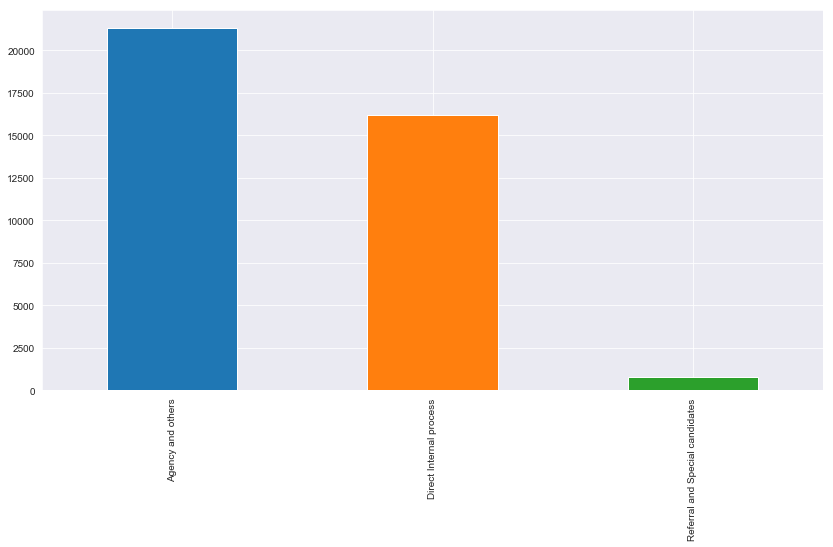

In [24]:
train['Channel_of_Recruitment'].value_counts().plot(kind ='bar', figsize=[14,7])

C:\Users\ABOFFICIAL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


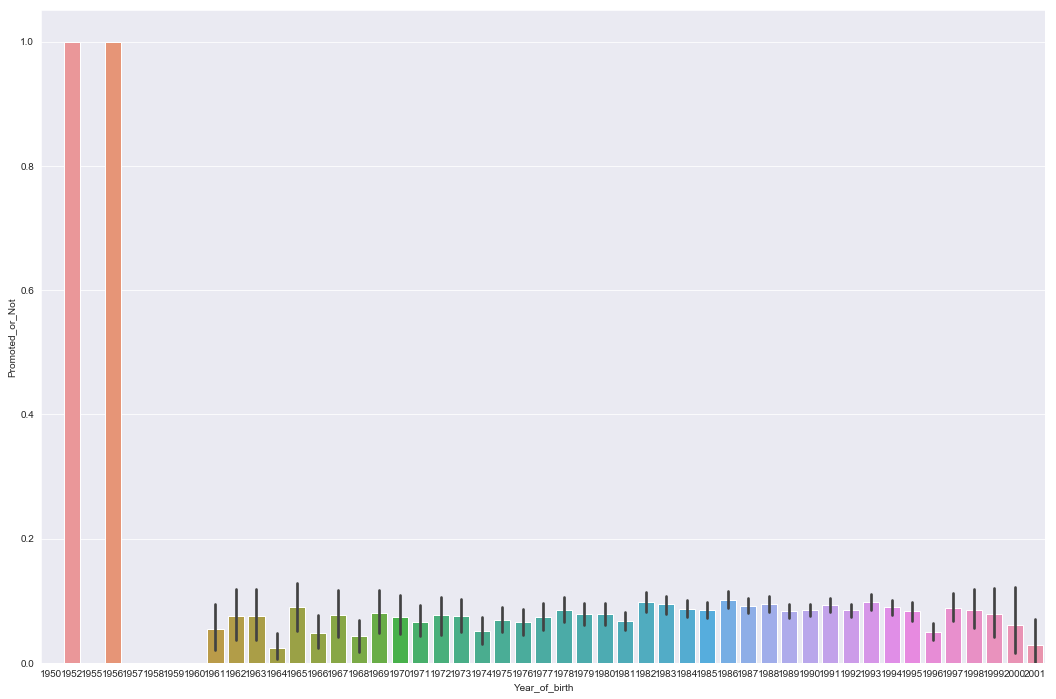

In [26]:
#age_of_resondent against our target
plt.figure(figsize=[18,12])
sns.barplot('Year_of_birth', 'Promoted_or_Not', data=train)

outliers are seen clearly from this far away distinct year-of-birrh

# interacting between features with respect to been promoted or not

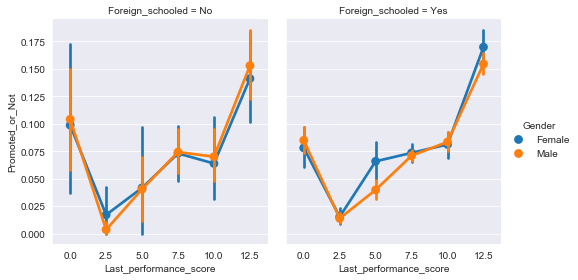

In [29]:
sns.factorplot(x="Last_performance_score", y="Promoted_or_Not", hue="Gender", col="Foreign_schooled",data=train, aspect=0.9, size=4, ci=95.0)

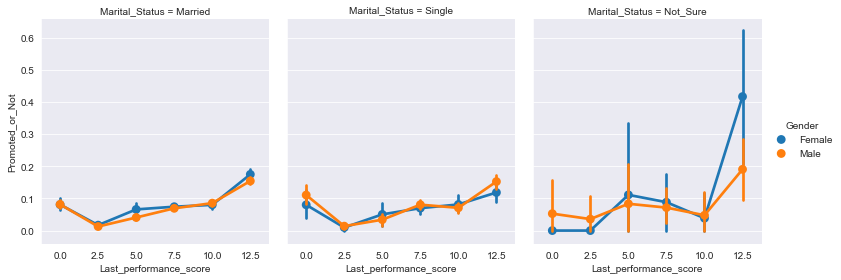

In [30]:
sns.factorplot(x="Last_performance_score", y="Promoted_or_Not", hue="Gender", col="Marital_Status",data=train, aspect=0.9, size=4, ci=95.0)

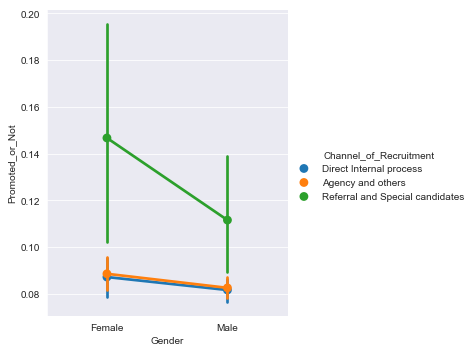

In [31]:
sns.factorplot(x="Gender", y="Promoted_or_Not", hue="Channel_of_Recruitment",data=train, aspect=0.9, size=5, ci=95.0)

wow! it is crystalclear that those that are referred are more likely to be promoted.. this is a good feature to work with

In [68]:
#Lets preview the uniqueness of 'state of origin' data if contains 37 states or less than
train['State_Of_Origin'].unique()

array(['Anambra', 'Katsina', 'Niger', 'Akwa Ibom', 'Enugu', 'Oyo', 'Lagos', 'Ondo', 'Kwara', 'Edo', 'Bauchi', 'Taraba', 'Rivers', 'Kaduna', 'Plateau', 'Ekiti', 'Borno', 'Imo', 'Cross River', 'Kano', 'Fct', 'Ogun', 'Gombe', 'Delta', 'Benue', 'Zamfara', 'Osun', 'Abia', 'Kebbi', 'Adamawa', 'Nassarawa', 'Sokoto', 'Kogi', 'Jigawa', 'Bayelsa', 'Yobe', 'Ebonyi'], dtype=object)

Commemt: Yes, 37 unique state found as expected, so we can create some feature engineering with these in the latter part of analysis

# FEATURE ENGINEERING

Lets Classify states into Geopolitical zone to see which zone dominates in working

In [37]:
def zone(x):
    if x == 'Benue':
        return 'North_Central'
    elif x == 'Kogi':
        return 'North_Central'
    elif x == 'Kwara':
        return 'North_Central'
    elif x == 'Nassarawa':
        return 'North_Central'
    elif x == 'Niger':
        return 'North_Central'
    elif x == 'Plateau':
        return 'North_Central'
    elif x == 'Fct':
        return 'North_Central'
    elif x == 'Adamawa':
        return 'North_East'
    elif x == 'Bauchi':
        return 'North_East'
    elif x == 'Borno':
        return 'North_East'
    elif x == 'Gombe':
        return 'North_East'
    elif x == 'Taraba':
        return 'North_East'
    elif x == 'Yobe':
        return 'North_East'
    elif x == 'Jigawa':
        return 'North_West'
    elif x == 'Kaduna':
        return 'North_West'
    elif x == 'Kano':
        return 'North_West'
    elif x == 'Katsina':
        return 'North_West'
    elif x == 'Kebbi':
        return 'North_West'
    elif x == 'Sokoto':
        return 'North_West'
    elif x == 'Zamfara':
        return 'North_West'
    elif x == 'Abia':
        return 'South_East'
    elif x == 'Anambra':
        return 'South_East'
    elif x == 'Ebonyi':
        return 'South_East'
    elif x == 'Enugu':
        return 'South_East'
    elif x == 'Imo':
        return 'South_East'
    elif x == 'Akwa Ibom':
        return 'South_South'
    elif x == 'Bayelsa':
        return 'South_South'
    elif x == 'Cross River':
        return 'South_South'
    elif x == 'Rivers':
        return 'South_South'
    elif x == 'Delta':
        return 'South_South'
    elif x == 'Edo':
        return 'South_South'
    else:
        return 'South_West'
train['Geopolitical_zone'] = train['State_Of_Origin'].apply(zone)
newz =train[['State_Of_Origin','Geopolitical_zone']]

In [38]:
def zone_test(x):
    if x == 'Benue':
        return 'North_Central'
    elif x == 'Kogi':
        return 'North_Central'
    elif x == 'Kwara':
        return 'North_Central'
    elif x == 'Nassarawa':
        return 'North_Central'
    elif x == 'Niger':
        return 'North_Central'
    elif x == 'Plateau':
        return 'North_Central'
    elif x == 'Fct':
        return 'North_Central'
    elif x == 'Adamawa':
        return 'North_East'
    elif x == 'Bauchi':
        return 'North_East'
    elif x == 'Borno':
        return 'North_East'
    elif x == 'Gombe':
        return 'North_East'
    elif x == 'Taraba':
        return 'North_East'
    elif x == 'Yobe':
        return 'North_East'
    elif x == 'Jigawa':
        return 'North_West'
    elif x == 'Kaduna':
        return 'North_West'
    elif x == 'Kano':
        return 'North_West'
    elif x == 'Katsina':
        return 'North_West'
    elif x == 'Kebbi':
        return 'North_West'
    elif x == 'Sokoto':
        return 'North_West'
    elif x == 'Zamfara':
        return 'North_West'
    elif x == 'Abia':
        return 'South_East'
    elif x == 'Anambra':
        return 'South_East'
    elif x == 'Ebonyi':
        return 'South_East'
    elif x == 'Enugu':
        return 'South_East'
    elif x == 'Imo':
        return 'South_East'
    elif x == 'Akwa Ibom':
        return 'South_South'
    elif x == 'Bayelsa':
        return 'South_South'
    elif x == 'Cross River':
        return 'South_South'
    elif x == 'Rivers':
        return 'South_South'
    elif x == 'Delta':
        return 'South_South'
    elif x == 'Edo':
        return 'South_South'
    else:
        return 'South_West'
test['Geopolitical_zone'] = test['State_Of_Origin'].apply(zone_test)
newx =test[['State_Of_Origin','Geopolitical_zone']]

In [39]:
#Evaluating the Age of workers in the dataset, These will be a good feature creation which will improve model performance
train['Age'] = 2019 - train['Year_of_birth']
test['Age'] = 2019 - test['Year_of_birth']

In [40]:
#Lets Evaluate The Age the worker got the job or was recruited into the company, A good feature also
train['Start_Work_Age'] = train['Year_of_recruitment'] -train['Year_of_birth']
test['Start_Work_Age'] = test['Year_of_recruitment'] -test['Year_of_birth']

In [41]:
#Lets assume the workflow is till date(2019), so we can evaluate how long he/she has served in the company. 
train['Years_of_Service'] = train['Age'] -train['Start_Work_Age']
test['Years_of_Service'] = test['Age'] -test['Start_Work_Age']

In [42]:
#Describing the train/test data to check for Min.and max. Age of workers
print('[Train details]' , '\n\n',train['Age'].describe().astype(int) ,'\n\n','[Test details]' , '\n\n', test['Age'].describe().astype(int))

[Train details] 

 count    38312
mean        32
std          7
min         18
25%         27
50%         31
75%         37
max         69
Name: Age, dtype: int32 

 [Test details] 

 count    16496
mean        32
std          7
min         18
25%         27
50%         31
75%         37
max         61
Name: Age, dtype: int32


# FEATURE CREATION/CROSSING

In [43]:
#Defining a fxn to classify Age with respect to Nigeria mode of classification
def age_category(x):
    if x >= 15 and x <= 24:
        return 'Early_working_Age'
    elif x >= 25 and x <= 54:
        return 'Prime_working_Age'
    elif x >= 55 and x <= 64:
        return 'Mature_working_Age'
    else:
        return 'Elderly_working_Age'
train['Age_category'] = train['Age'].apply(age_category)
newxx =train[['Age','Age_category']]

In [44]:
def age_category_test(x):
    if x >= 15 and x <= 24:
        return 'Early_working_Age'
    elif x >= 25 and x <= 54:
        return 'Prime_working_Age'
    elif x >= 55 and x <= 64:
        return 'Mature_working_Age'
    else:
        return 'Elderly_working_Age'
test['Age_category'] = test['Age'].apply(age_category_test)
newzz =test[['Age','Age_category']]

In [45]:
#defining a fxn to grade the scoresheet to understand their performance better
def Grade_scores(x):
    if x >= 31 and x <= 39:
        return 'F'
    elif x > 39  and x <= 44:
        return 'E'
    elif x > 44 and x <= 49:
        return 'D'
    elif x > 49 and x <= 59:
        return 'C'
    elif x > 59 and x <= 69:
        return 'B'
    else:
        return 'A'
train['Grade_score'] = train['Training_score_average'].apply(Grade_scores)
newY =train[['Training_score_average','Grade_score']]

In [46]:
def Grade_scorest(x):
    if x >= 31 and x <= 39:
        return 'F'
    elif x > 39  and x <= 44:
        return 'E'
    elif x > 44 and x <= 49:
        return 'D'
    elif x > 49 and x <= 59:
        return 'C'
    elif x > 59 and x <= 69:
        return 'B'
    else:
        return 'A'
test['Grade_score'] = test['Training_score_average'].apply(Grade_scorest)
newZ =test[['Training_score_average','Grade_score']]

# IN NIGERIA, Based on Research / Law from the government, it is well known that retirement age is 60years or 35years of work experience,
creating a new feature with these will help in model prediction, Doing some visualization in the latter part will dispute the fact better

In [49]:
#defining a fxn to retirement age or clocking retirement age
def retirement(x):
    if x >= 59:
        return 'Clocked/clockering_RA'
    else:
        return 'Not_yet'
test['Near_retirement'] = test['Age'].apply(retirement)
newZZ =test[['Age','Near_retirement']]

In [50]:
def retirementX(x):
    if x >= 59:
        return 'Clocked/clockering_RA'
    else:
        return 'Not_yet'
train['Near_retirement'] = train['Age'].apply(retirementX)
newZY =train[['Age','Near_retirement']]

In [51]:
#defining a fxn to classify their performance
def performance(x):
    if x == 10.0 and x == 12.5:
        return 'Excellent'
    elif x == 7.5:
        return 'Good'
    else:
        return 'Poor'
train['Performance_category'] = train['Last_performance_score'].apply(performance)
newZYxx =train[['Last_performance_score','Performance_category']]

In [52]:
def performancet(x):
    if x == 10.0 and x == 12.5:
        return 'Excellent'
    elif x == 7.5:
        return 'Good'
    else:
        return 'Poor'
test['Performance_category'] = test['Last_performance_score'].apply(performancet)
newZYxxy =test[['Last_performance_score','Performance_category']]

In [53]:
def workedt(x):
    if x == '0':
        return 'no experience'
    elif x == '1' and '2':
        return 'less experience / not commited'
    elif x == '3' and '4':
        return 'experience / not commited'
    else:
        return 'experience / not commited'
test['worked_with'] = test['No_of_previous_employers'].apply(workedt)
br =test[['No_of_previous_employers','worked_with']]

In [54]:
def worked(x):
    if x == '0':
        return 'no experience'
    elif x == '1' and '2':
        return 'less experience / not commited'
    elif x == '3' and '4':
        return 'experience / not commited'
    else:
        return 'experience / not commited'
train['worked_with'] = train['No_of_previous_employers'].apply(worked)
brt =train[['No_of_previous_employers','worked_with']]

In [59]:
def att(train):
    if (train['Last_performance_score'] >=10) & (train['Age'] <= 55) & (train['Training_score_average']  >=70) & (train['Previous_Award'] == 1) & (train['Targets_met'] == 1):
        val = 1
    else:
        val =0
    return val

In [60]:
train['consistent_perf'] = train.apply(att, axis =1)

In [61]:
def attt(test):
    if (test['Last_performance_score'] >=10) & (test['Age'] <= 55) & (test['Training_score_average']  >=70) & (test['Previous_Award'] == 1) & (test['Targets_met'] == 1):
        val = 1
    else:
        val =0
    return val

In [62]:
test['consistent_perf'] = test.apply(attt, axis =1)

# BINNING

In [63]:
#lets binned their 'last score performance' e.g 0 - 2.5 binned as 1. this will be a good feature for model performance too
bins=[0, 5, 10, 15]
labels =[1,2,3]
train['Binned_performance'] = pd.cut(train['Last_performance_score'], bins = bins, labels =labels)

In [64]:
bins=[0, 5, 10, 15]
labels =[1,2,3]
test['Binned_performance'] = pd.cut(test['Last_performance_score'], bins = bins, labels =labels)

In [65]:
#Lets checking for missing values
train.apply(lambda x: sum(x.isnull()), axis =0)

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
Geopolitical_zone                         0
Age                                       0
Start_Work_Age                            0
Years_of_Service                

In [66]:
#Lets checking for missing values
test.apply(lambda x: sum(x.isnull()), axis =0)

EmployeeNo                                0
Division                                  0
Qualification                           730
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Geopolitical_zone                         0
Age                                       0
Start_Work_Age                            0
Years_of_Service                          0
Age_category                    

In [68]:
#lets take a log fxn to skew the distribution due to the outliers
test['log_Age'] = np.log(test['Age'])
train['log_Age'] = np.log(train['Age'])

# DATA EXPLORATION / ANALYSIS - PART 2

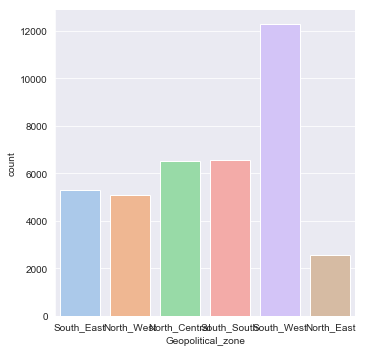

In [70]:
sns.catplot(x ='Geopolitical_zone', kind ='count',palette='pastel', data = train);

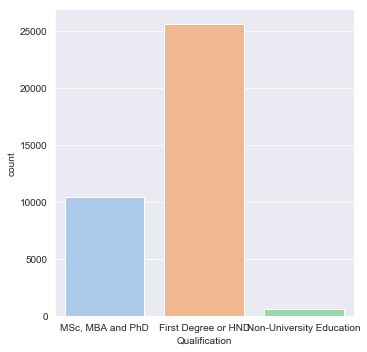

In [71]:
sns.catplot(x ='Qualification', kind ='count', palette='pastel', data = train);

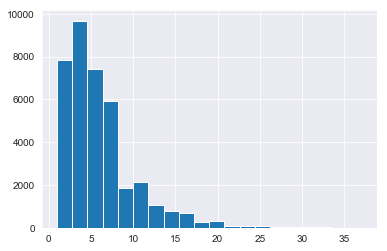

In [72]:
train['Years_of_Service'].hist(bins=20)

# MULTIVARIATE ANALYSIS

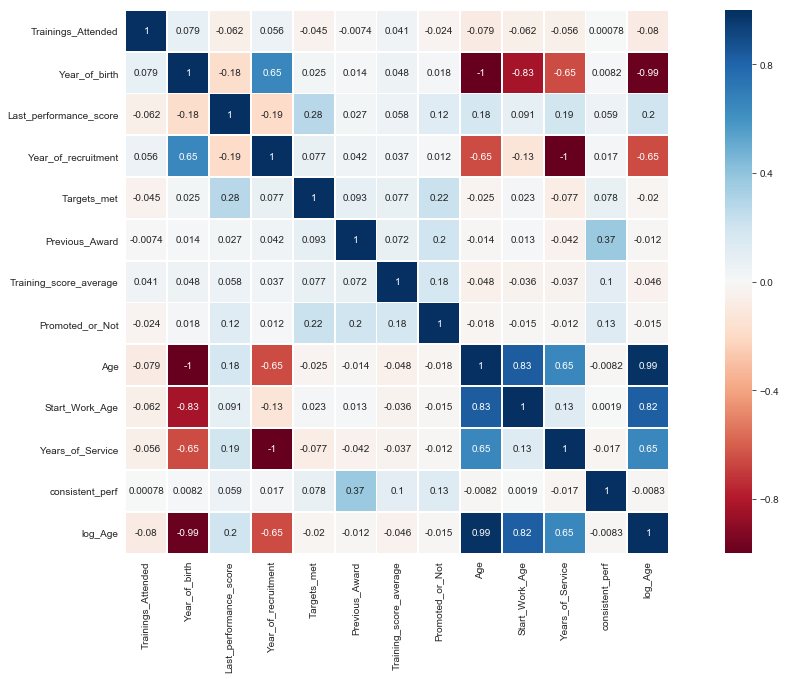

In [73]:
#correlelogram- plot heatmap to find correlation among features
corrmat =train.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

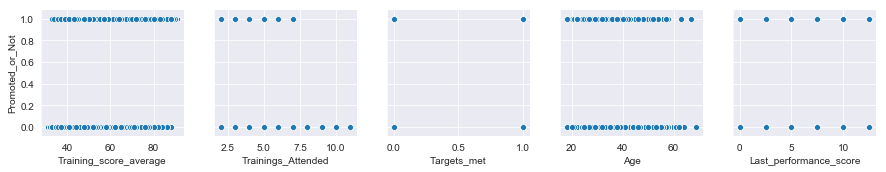

In [74]:
sns.pairplot(train, x_vars=['Training_score_average','Trainings_Attended','Targets_met','Age','Last_performance_score'], y_vars =['Promoted_or_Not'])

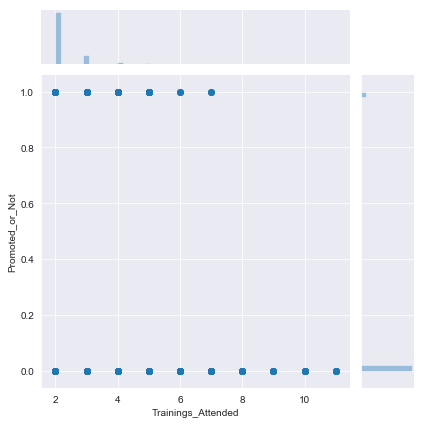

In [75]:
sns.jointplot(x='Trainings_Attended', y='Promoted_or_Not', data =train, kind ='scatter')

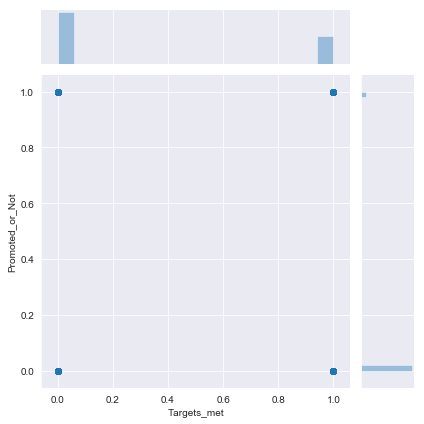

In [76]:
sns.jointplot(x='Targets_met', y='Promoted_or_Not', data =train)

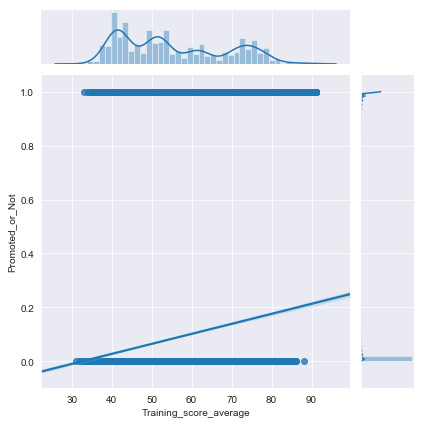

In [77]:
sns.jointplot(x='Training_score_average', y='Promoted_or_Not', data =train, kind ='reg')

In [78]:
train.apply(lambda x: sum(x.isnull()), axis =0)

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
Geopolitical_zone                         0
Age                                       0
Start_Work_Age                            0
Years_of_Service                

In [80]:
test.apply(lambda x: sum(x.isnull()), axis =0)

EmployeeNo                                0
Division                                  0
Qualification                           730
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Geopolitical_zone                         0
Age                                       0
Start_Work_Age                            0
Years_of_Service                          0
Age_category                    

In [81]:
train.dtypes

EmployeeNo                               object
Division                                 object
Qualification                            object
Gender                                   object
Channel_of_Recruitment                   object
Trainings_Attended                        int64
Year_of_birth                             int64
Last_performance_score                  float64
Year_of_recruitment                       int64
Targets_met                               int64
Previous_Award                            int64
Training_score_average                    int64
State_Of_Origin                          object
Foreign_schooled                         object
Marital_Status                           object
Past_Disciplinary_Action                 object
Previous_IntraDepartmental_Movement      object
No_of_previous_employers                 object
Promoted_or_Not                           int64
Geopolitical_zone                        object
Age                                     

In [82]:
test.dtypes

EmployeeNo                               object
Division                                 object
Qualification                            object
Gender                                   object
Channel_of_Recruitment                   object
Trainings_Attended                        int64
Year_of_birth                             int64
Last_performance_score                  float64
Year_of_recruitment                       int64
Targets_met                               int64
Previous_Award                            int64
Training_score_average                    int64
State_Of_Origin                          object
Foreign_schooled                         object
Marital_Status                           object
Past_Disciplinary_Action                 object
Previous_IntraDepartmental_Movement      object
No_of_previous_employers                 object
Geopolitical_zone                        object
Age                                       int64
Start_Work_Age                          

In [83]:
train['Qualification'].replace(np.nan, 'dont know', inplace =True)
test['Qualification'].replace(np.nan, 'dont know', inplace =True)

In [84]:
#Lets pull out all rows with NaN and examin them
train[train.isnull().T.any().T]

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Geopolitical_zone,Age,Start_Work_Age,Years_of_Service,Age_category,Grade_score,Near_retirement,Performance_category,worked_with,consistent_perf,Binned_performance,log_Age
17,YAK/S/00024,Sourcing and Purchasing,First Degree or HND,Male,Agency and others,2,1994,0.0,2018,0,0,62,Lagos,Yes,Single,No,No,4,0,South_West,25,24,1,Prime_working_Age,B,Not_yet,Poor,experience / not commited,0,NaN,3.218876
21,YAK/S/00030,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1995,0.0,2018,0,0,36,Ekiti,Yes,Married,No,No,1,0,South_West,24,23,1,Early_working_Age,F,Not_yet,Poor,less experience / not commited,0,NaN,3.178054
36,YAK/S/00057,Commercial Sales and Marketing,First Degree or HND,Female,Agency and others,2,1992,0.0,2018,0,0,41,Bauchi,Yes,Married,No,No,1,0,North_East,27,26,1,Prime_working_Age,E,Not_yet,Poor,less experience / not commited,0,NaN,3.295837
37,YAK/S/00059,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1994,0.0,2018,1,0,39,Lagos,Yes,Married,No,No,1,0,South_West,25,24,1,Prime_working_Age,F,Not_yet,Poor,less experience / not commited,0,NaN,3.218876
43,YAK/S/00068,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1994,0.0,2018,0,0,53,Enugu,No,Married,No,No,0,1,South_East,25,24,1,Prime_working_Age,C,Not_yet,Poor,no experience,0,NaN,3.218876
55,YAK/S/00085,Regulatory and Legal services,First Degree or HND,Male,Agency and others,2,1992,0.0,2018,0,0,57,Anambra,Yes,Married,No,No,1,1,South_East,27,26,1,Prime_working_Age,C,Not_yet,Poor,less experience / not commited,0,NaN,3.295837
59,YAK/S/00090,Commercial Sales and Marketing,First Degree or HND,Female,Agency and others,2,1990,0.0,2018,0,0,43,Benue,Yes,Single,No,No,3,0,North_Central,29,28,1,Prime_working_Age,E,Not_yet,Poor,experience / not commited,0,NaN,3.367296
60,YAK/S/00091,Commercial Sales and Marketing,dont know,Female,Direct Internal process,2,2001,0.0,2018,0,0,47,Zamfara,Yes,Single,No,No,2,0,North_West,18,17,1,Early_working_Age,D,Not_yet,Poor,experience / not commited,0,NaN,2.890372
64,YAK/S/00097,Information Technology and Solution Support,First Degree or HND,Female,Direct Internal process,2,1998,0.0,2018,0,0,69,Kano,Yes,Married,No,No,1,0,North_West,21,20,1,Early_working_Age,B,Not_yet,Poor,less experience / not commited,0,NaN,3.044522
75,YAK/S/00112,People/HR Management,First Degree or HND,Female,Agency and others,2,1991,0.0,2018,1,0,46,Edo,Yes,Married,No,No,2,0,South_South,28,27,1,Prime_working_Age,D,Not_yet,Poor,experience / not commited,0,NaN,3.332205


In [85]:
#Due to binning, value with zero couldnt be binned. therefore lets replace NaN with zero
train['Binned_performance'].replace(np.nan, 0, inplace =True)
test['Binned_performance'].replace(np.nan, 0, inplace =True)

In [86]:
test.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Geopolitical_zone                      0
Age                                    0
Start_Work_Age                         0
Years_of_Service                       0
Age_category                           0
Grade_score                            0
Near_retirement 

In [87]:
train = train.drop(['Foreign_schooled','Past_Disciplinary_Action'], axis =1)
test= test.drop(['Foreign_schooled','Past_Disciplinary_Action'], axis =1)

In [88]:
x =train.drop(['Promoted_or_Not'], axis =1)
y =train.Promoted_or_Not

In [89]:
cate_features_index=np.where(x.dtypes != float) [0]; cate_features_index

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=int64)

In [90]:
model = CatBoostClassifier(iterations=5500, depth=7, learning_rate=0.0409, eval_metric ='Accuracy',use_best_model=True, random_seed=42)
model.fit(x,y,cat_features=cate_features_index,eval_set=(x,y))

0:	learn: 0.9393663	test: 0.9425767	best: 0.9425767 (0)	total: 2.07s	remaining: 3h 9m 45s
1:	learn: 0.9393402	test: 0.9423679	best: 0.9425767 (0)	total: 3.82s	remaining: 2h 55m 14s
2:	learn: 0.9395229	test: 0.9423940	best: 0.9425767 (0)	total: 5.25s	remaining: 2h 40m 18s
3:	learn: 0.9395490	test: 0.9424201	best: 0.9425767 (0)	total: 6.41s	remaining: 2h 26m 53s
4:	learn: 0.9393402	test: 0.9423679	best: 0.9425767 (0)	total: 7.07s	remaining: 2h 9m 34s
5:	learn: 0.9393402	test: 0.9423679	best: 0.9425767 (0)	total: 8.58s	remaining: 2h 10m 55s
6:	learn: 0.9394707	test: 0.9423679	best: 0.9425767 (0)	total: 9.96s	remaining: 2h 10m 19s
7:	learn: 0.9401232	test: 0.9424462	best: 0.9425767 (0)	total: 11s	remaining: 2h 5m 59s
8:	learn: 0.9404625	test: 0.9424462	best: 0.9425767 (0)	total: 11.6s	remaining: 1h 58m 27s
9:	learn: 0.9399144	test: 0.9424984	best: 0.9425767 (0)	total: 12.3s	remaining: 1h 52m 10s
10:	learn: 0.9398883	test: 0.9425767	best: 0.9425767 (0)	total: 13.1s	remaining: 1h 48m 33s
11:

KeyboardInterrupt: 

In [106]:
pred =model.predict(test)
pred = pred.astype(np.int)

In [110]:
xfinal =pd.DataFrame({'EmployeeNo': test['EmployeeNo']})
yfinal = pd.DataFrame ({'Promoted_or_Not' :pred})

In [112]:
submission =pd.concat([xfinal, yfinal], axis ='columns')
submission.head()

,EmployeeNo,Promoted_or_Not
0,YAK/S/00005,0
1,YAK/S/00011,0
2,YAK/S/00015,0
3,YAK/S/00016,0
4,YAK/S/00017,0


In [ ]:
feature_scorepd.DataFrame(list(zip(x.dtypes.index, model.get_feature_importance(Pool(x, label =y, cat_features= cate_features_index)))),
                          columns=['Features', 'Scores']

In [114]:
submission.to_csv('ab4.csv', index =False)

In [ ]:
import sklearn.metrics as sklm

In [ ]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])

def print_metrics(labels, probs, threshold):
    scores = score_model(probs, threshold)
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy        %0.2f' % sklm.accuracy_score(labels, scores))
    print('AUC             %0.2f' % sklm.roc_auc_score(labels, probs[:,1]))
    print('Macro precision %0.2f' % float((float(metrics[0][0]) + float(metrics[0][1]))/2.0))
    print('Macro recall    %0.2f' % float((float(metrics[1][0]) + float(metrics[1][1]))/2.0))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])
    
probabilities = model.predict_proba(x)
print_metrics(y, probabilities, 0.5)

In [116]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     35071
           1       0.72      0.40      0.52      3241

   micro avg       0.94      0.94      0.94     38312
   macro avg       0.83      0.69      0.74     38312
weighted avg       0.93      0.94      0.93     38312



In [ ]:
#visualize features importance
plt.rcparams['figure.figsize'] =(20,10)
ax = feature_score.plot('Feature', 'Score', kind ='bar', color='c')
ax.set_title('RANKING FOR CATBOOST FEATURES IMPORATANCE', fontsize =23)
ax.set_xlabel('Features')
rects =ax.patches

#get features scores as labels round to 2decimalplaces
labels= feature_score['Score'].round(2)
for rect, label in zip(rects, labels):
    height =rect.get_height()
    ax.text(rect.get_x() + rect_get_width() / 2, height + 0.35, label, ha ='center', va ='bottom')
plt.show